<a href="https://colab.research.google.com/github/locdeng/big-data-project/blob/main/big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
"""
from google.colab import files
files.upload()

df

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
datasets_url = ('https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?datasetId=1957837')
od.download('https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?datasetId=1957837')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: locdang27
Your Kaggle Key: ··········


100%|██████████| 4.16M/4.16M [00:00<00:00, 105MB/s]

In [ ]:
data_filename = ('./flight-price-prediction/Clean_Dataset.csv')

In [ ]:
#Reading the CSV file
df = pd.read_csv(data_filename)

In [ ]:
df.shape #Shape of the dataset. This dataset has 300,153 rows and 12 columns

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
#Dropping useless column
df = df.drop(['Unnamed: 0', 'days_left'],axis = 1)

df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,5955


In [ ]:
df.columns #Viewing all the columns of the dataset

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'price'],
      dtype='object')

In [ ]:
df.info() #info() gives us the information about the shape, datatype and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 22.9+ MB


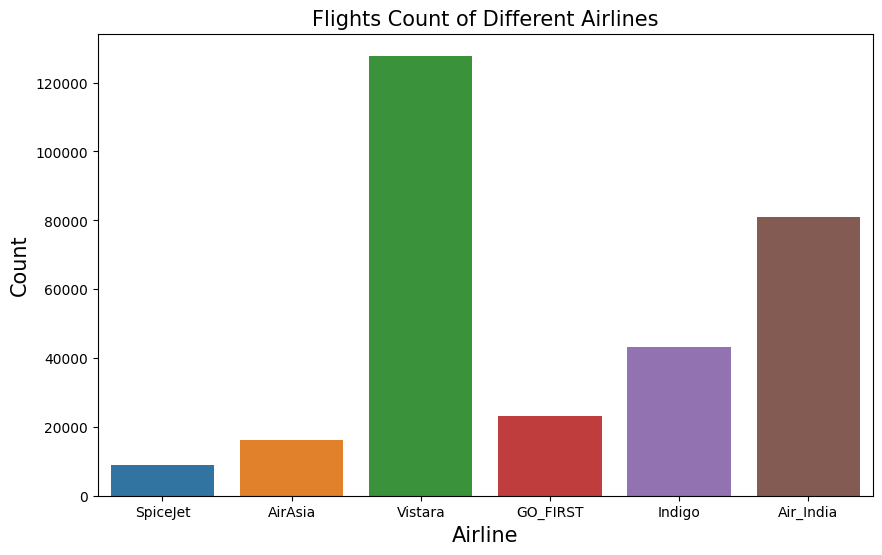

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='airline',data=df)
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Text(0.5, 0, 'Price in ₹')

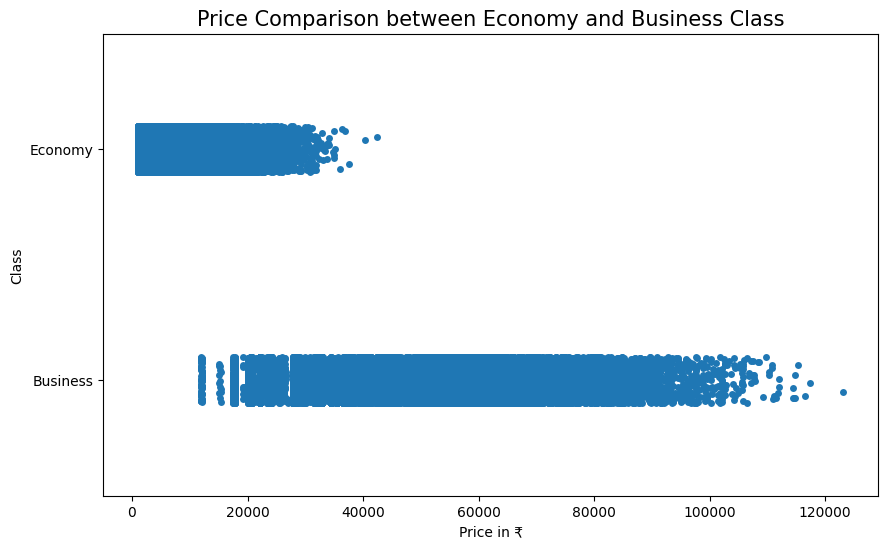

In [ ]:
plt.figure(figsize=(10,6))
sns.stripplot(x='price',y='class',data=df)
plt.title('Price Comparison between Economy and Business Class',fontsize=15)
plt.ylabel('Class')
plt.xlabel('Price in ₹')

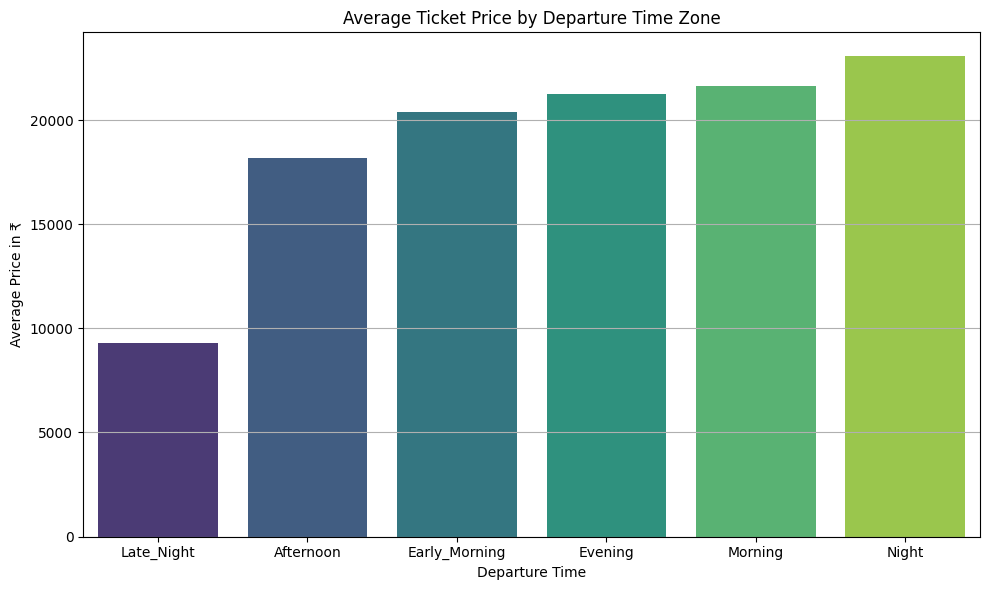

In [ ]:
# 출발 시간대별 평균 가격 계산
mean_prices = df.groupby('departure_time')['price'].mean().sort_values()

# 출발 시간대에 따른 평균 가격 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_prices.index, y=mean_prices.values, palette="viridis")
plt.title('Average Ticket Price by Departure Time Zone')
plt.xlabel('Departure Time')
plt.ylabel('Average Price in ₹')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df = df.drop('flight',axis = 1) # Dropping useless columns

KeyError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [ ]:
import matplotlib.pyplot as plt

# Specify a font that is available in Google Colab
plt.rcParams['font.family'] = 'NanumGothic'

Mean Squared Error: 512506057.4136998
Root Mean Squared Error: 22638.596630836015
Mean Absolute Error: 19669.14749938165
R-squared: 0.005773653737047968


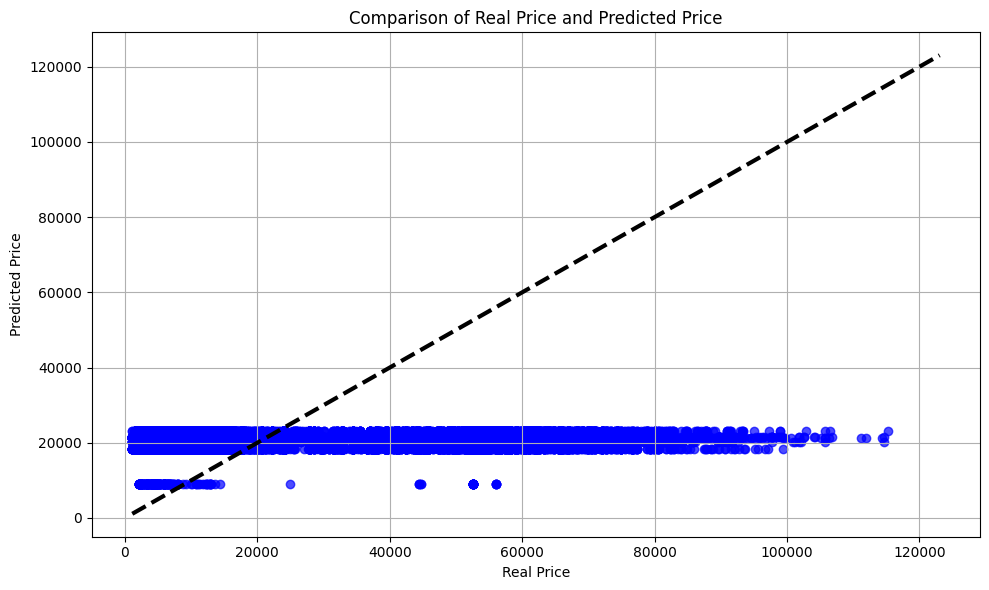

In [ ]:
# One-hot encoding: 'department_time' column
encoder = OneHotEncoder(drop='first')
encoded_departure_time = encoder.fit_transform(df[['departure_time']]).toarray()
encoded_df = pd.DataFrame(encoded_departure_time, columns=encoder.get_feature_names_out(['departure_time']))

# Add the encoded column to the main data frame and remove the original 'department_time' column
clean_dataset_encoded = pd.concat([df, encoded_df], axis=1)
clean_dataset_encoded.drop('departure_time', axis=1, inplace=True)

# Split training and test data sets
X = clean_dataset_encoded.drop(['price', 'airline', 'source_city', 'stops', 'arrival_time', 'destination_city', 'class', 'duration'], axis=1)
y = clean_dataset_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Application
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize prediction and actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Real Price and Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()